# <span style="color:red"> Numerical Simulation Laboratory (NSL) </span>

In [23]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

In [24]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

In [25]:
from mpl_toolkits.mplot3d import Axes3D

<h1><font color='ForestGreen'>ESERCITAZIONE 11: Deep Learning e Fit </font> </h1>

<h3><font color = 'LightGreen'>Intro</font></h3>

In generale, l'obiettivo di questa esercitazione e' prendere familiarita' col concetto di reti neurali ed implementarle tramite librerie ad alto livello come Keras.
Prendiamo un processo dalla struttura stocastica che fornisce le coppie di dati $(x,y)$, ricavati a partire dal campionamento della equazione:
<p style = "text-align:center"> $y_i= f(x_i) + \eta_i,$ </p>
dove $f(x)$ e' una generica funzione, sia questa nota o sconosciuta, e $\eta$ una variabile aleatoria di tipo gaussiano a media nulla e scorellata nei vari punti, cioe':
<p style = "text-align:center"> $\langle \eta_i \rangle=0 \quad \langle \eta_i \eta_j \rangle = \delta_{ij} \sigma$ </p>
L'introduzione di tale rumore che sporca i dati di input serve ad ottenere un dataset che approssi il piu' possibile quanto si ottiene in situazioni reali.
L'obiettivo essenzialmente e' sfruttare le potenzialita' delle reti neurali per andare a fittare piu' funzioni, per poi sfruttare i dati di validazione per verificare la bonta' del modello.

1. $f(x) = 2x + 1$
2. $f(x)=4-3x-2x^2+3x^3$
3. $f(x)=\sin(x^2+y^2)$

<h2><font color = 'LimeGreen'>ESERCIZIO 11.1: Fit Lineare</font></h2>

In breve, in questo primo esercizio l'obiettivo che ci si propone e' di effettuare un fit di una funzione lineare 
${f(x) = 2x+1}$ servendosi del paradigma delle reti neurali: nella fattispecie, in questo caso, di una rete 
sequenziale costituita da un singolo neurone.
Infatti, basti osservare che questo e' perfettamente sufficiente giacche' ogni neurone per definizione riceve
un input $x$ e restituisce un output $z = wx+b$, dove $w$ e $b$ rappresentano rispettivamente il peso e il bais 
e costituiscono nient'altro che i parametri da calibrare modulo minimizzazione della funzione costo.


In termini piu' generali, il Supervised Machine Learning prevede che,dato un set di dati in input e output, 
si trovi la migliore funzione che leghi tali dati. A tale scopo si suddividono i dati in due sottoinsiemi: training e test. 
I primi sono fondamentali per l'addestramento, i secondi sono utili per testare la funzione trovata. 
Tale operazione passa sotto il nome di cross-validation ed e' essenziale per non introdurre errori e giungere a conclusioni 
sbagliete. Tipicamente quanto si fa e' prendere il $90\%$ dati di training e il $10\%$ dati di test.
In seconda battuta, si minimizza la funzione costo sui dati di training per individuare i parametri ottimali.
Infine, si effettua una verifica andando a valutare la funzione costo sui parametri di test.


Tutto questo è realizzato tramite le reti neurali.
Ciascuna è costituita da diversi livelli caratterizzati da diversi nodi. Ogni nodo possiede diversi parametri che verranno ottimizzati in modo da minimizzare la funzione costo. Quest'ultimo processo è affidato al calcolatore nella fase di training.
Per concludere si può testare la rete con i dati rimasti

In [26]:
#PARAMETRI TARGET:
m = 2
b = 1


Consideriamo ora i vari dati di input d'interesse: il numero di epoche; il numero di dati di training; il numero di dati di test; l'intensita' del rumore.

In [27]:
#PARAMETRI FIT:
num_epochs = 20
num_train = 1000
num_batch_size = 32
num_test = 50
noise = 0.3

Settiamo i dati di training e test sporcandoli con rumore gaussiano.

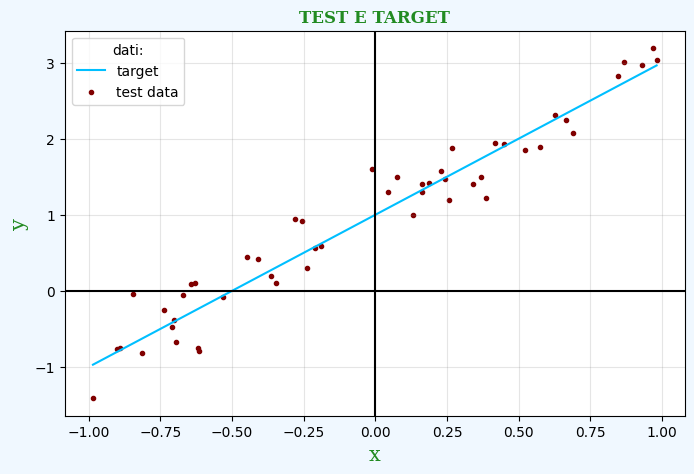

In [28]:
x_train = np.array([])
x_test = np.array([])
y_train = np.array([])
y_target = np.array([])
y_test = np.array([])

np.random.seed(2)

#GENERAZIONE DATASET INPUT: 
def set():
    
    global x_train, x_test, y_target, y_train, y_test
    x_train = np.random.uniform(-1,1,num_train)
    
    x_test = np.random.uniform(-1,1, num_test)
     
    x_test.sort()
    
    y_target = m*x_test + b

    y_train = np.random.normal(m*x_train + b, noise)
   
    y_test = np.random.normal(m*x_test + b, noise)
set()
#PLOT:

plt.figure(figsize=(8,5), facecolor = "AliceBlue")

plt.plot(x_test, y_target, label = "target", color = "DeepSkyBlue")
plt.scatter(x_test, y_test, marker = ".", color = "Maroon" , label = "test data" )
font = {'family':'serif','color':'ForestGreen','size':15}

plt.xlabel("x", fontdict = font)
plt.ylabel("y", fontdict = font)
plt.title("TEST E TARGET", fontweight = "bold", family= "serif" ,color = "ForestGreen")
plt.axhline(y=0, color = "k")
plt.axvline(x=0, color = "k")
plt.grid("true", color = "grey", alpha = 0.2)
plt.legend(title = "dati:")

plt.show()


Andiamo a questo punto ad utilizzare le librerie Keras e a creare l'oggetto modello per configurare la rete neurale desiderata.

In [29]:
model = tf.keras.Sequential()#IMPOSTIAMO MODELLO SEQUENZIALIE

model.add(Dense(1, input_shape=(1,)))#SETTIAMO IL PRIMO LEYER: NUMERO_NEURONI = 1; 

model.compile(optimizer="sgd", loss = "mse", metrics = ["mse"])#IMPOSTIAMO OTTIMIZZATOR= STOCHASTCI GRADIENT DESCENT;
                                                               #FUNZIONE COSTO = MEAN SQUARE ERROR
                                                               #METRICA = MEAN SQUARE ERROR
#EFFETTUIAMO FIT SFRUTTANDO I DATI DI TRAINING:
history = model.fit(    x=x_train, y=y_train, 
                        batch_size=num_batch_size, epochs=num_epochs,
                        # shuffle input before each epoch (not mandatory)
                        shuffle=True,                        
                        validation_data=(x_test, y_test))
 


Epoch 1/20
32/32 [==============================] - 0s 5ms/step - loss: 3.5890 - mse: 3.5890 - val_loss: 2.6651 - val_mse: 2.6651
Epoch 2/20
32/32 [==============================] - 0s 3ms/step - loss: 2.2358 - mse: 2.2358 - val_loss: 1.7118 - val_mse: 1.7118
Epoch 3/20
32/32 [==============================] - 0s 3ms/step - loss: 1.4644 - mse: 1.4644 - val_loss: 1.1242 - val_mse: 1.1242
Epoch 4/20
32/32 [==============================] - 0s 3ms/step - loss: 0.9780 - mse: 0.9780 - val_loss: 0.7546 - val_mse: 0.7546
Epoch 5/20
32/32 [==============================] - 0s 3ms/step - loss: 0.6690 - mse: 0.6690 - val_loss: 0.5179 - val_mse: 0.5179
Epoch 6/20
32/32 [==============================] - 0s 3ms/step - loss: 0.4687 - mse: 0.4687 - val_loss: 0.3639 - val_mse: 0.3639
Epoch 7/20
32/32 [==============================] - 0s 3ms/step - loss: 0.3377 - mse: 0.3377 - val_loss: 0.2645 - val_mse: 0.2645
Epoch 8/20
32/32 [==============================] - 0s 3ms/step - loss: 0.2519 - mse: 0.25

In [30]:
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% #
# ANDIAMO A VALUTARE PESI E BIAS: {w <~> m=2 b <~> q=1} #
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% #

def print_results():
    print("PARAMETRI TRAINING MODELLO:")
    w,b = model.get_weights() # hope they are similar to m=2 and q=1.
                          # Was the fit successful?
    print("COEFFICIENTE ANGOLARE:  m = "+str(w))
    print("INTERCETTA: q = "+str(b))
    print()

    # %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% #
    # VALUTIAMO IL MODELLO ESTRAPOLATO SU DATI TEST E TARGET #
    # %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% #

    # evaluate with TEST data
    print("TEST DATA:")
    score = model.evaluate(x_test, y_test, batch_size=num_batch_size, verbose = 0)
    print('Test loss:     ', score[0])
    print('Test accuracy: ', score[1])
    print()

    # evaluate with the EXACT curve
    print("EXACT CURVE:")
    score = model.evaluate(x_test, y_target, batch_size=num_batch_size, verbose=0)
    print('Test loss:     ', score[0])
    print('Test accuracy: ', score[1])
    
print_results()

PARAMETRI TRAINING MODELLO:
COEFFICIENTE ANGOLARE:  m = [[1.9742421]]
INTERCETTA: q = [0.9955214]

TEST DATA:
Test loss:      0.08239106833934784
Test accuracy:  0.08239106833934784

EXACT CURVE:
Test loss:      0.00022762954176869243
Test accuracy:  0.00022762954176869243


4/4 [==============================] - 0s 3ms/step


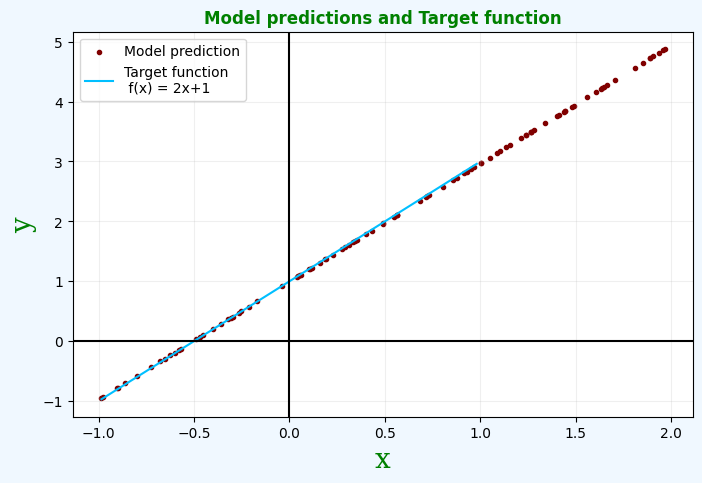

In [33]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% #
# COMPARAZIONE PREDIZIONI CON LA TARGET FUNCTION
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% #

# generate predictions
x_predicted = np.random.uniform(-1, 2, 100) 
y_predicted = model.predict(x_predicted)

# PLOT
plt.figure(figsize=(8,5), facecolor = "AliceBlue")
plt.scatter(x_predicted, y_predicted, marker = ".", color='Maroon', label = "Model prediction")
plt.plot(x_test, y_target, label = "Target function\n f(x) = 2x+1", color = "DeepSkyBlue")
font = {'family':'serif','color':'green','size':20}
plt.xlabel("x", fontdict = font)
plt.ylabel("y", fontdict = font)
plt.title("Model predictions and Target function", fontweight = "bold", color = "green")
plt.axhline(y=0, color = "k")
plt.axvline(x=0, color = "k")
plt.grid(alpha = 0.2)
plt.legend()
plt.show()

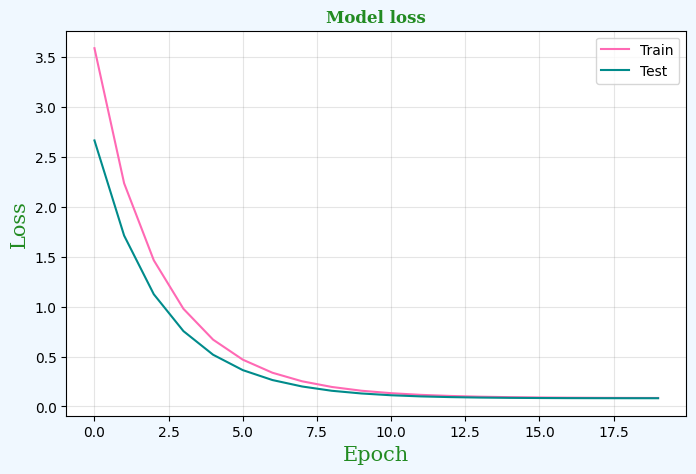

In [34]:
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# TRAINING HISTORY:
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

plt.figure(figsize=(8,5), facecolor = "AliceBlue")

# Plot training & validation loss values
plt.plot(history.history['loss'], color = "hotpink" )
plt.plot(history.history['val_loss'], color = "DarkCyan")
plt.title('Model loss', fontweight = "bold", family = "serif", color = "ForestGreen")
font = {'family':'serif', 'color':'ForestGreen', 'size':'15'}
plt.ylabel('Loss', fontdict = font)
plt.xlabel('Epoch', fontdict = font)
plt.legend(['Train', 'Test'], loc='best')
plt.grid("true", color = "grey", alpha = 0.2)
plt.show()
#plt.savefig("imgs/sgm_"+str(sigma)+".png")

Si nota che all'aumentare del numero delle epoche, la funzione costo diminuisce. Questo è dovuto al fatto che la rete continua ad imparare dai dati perfezionando il set di parametri dei nodi.

<h3><font color = 'LightGreen'>Osservazioni</font></h3>

<h4><font color = 'Black'>1)Batch Size a Numero Epoche Fissato</font></h4>

Proviamo anzitutto ad analizzare l'andamento della funzione costo in funzione delle epoche per diversi batch_size

batch_size = 20
PARAMETRI TRAINING MODELLO:
COEFFICIENTE ANGOLARE:  m = [[2.0273297]]
INTERCETTA: q = [0.99827856]

TEST DATA:
Test loss:      0.08298420161008835
Test accuracy:  0.08298420161008835

EXACT CURVE:
Test loss:      0.0002532537328079343
Test accuracy:  0.0002532537328079343
batch_size = 50
PARAMETRI TRAINING MODELLO:
COEFFICIENTE ANGOLARE:  m = [[1.9148734]]
INTERCETTA: q = [0.9914575]

TEST DATA:
Test loss:      0.08396486937999725
Test accuracy:  0.08396486937999725

EXACT CURVE:
Test loss:      0.0023901420645415783
Test accuracy:  0.0023901420645415783
batch_size = 100
PARAMETRI TRAINING MODELLO:
COEFFICIENTE ANGOLARE:  m = [[0.99343246]]
INTERCETTA: q = [0.9417852]

TEST DATA:
Test loss:      0.40321946144104004
Test accuracy:  0.40321946144104004

EXACT CURVE:
Test loss:      0.331409752368927
Test accuracy:  0.331409752368927
batch_size = 200
PARAMETRI TRAINING MODELLO:
COEFFICIENTE ANGOLARE:  m = [[0.6586939]]
INTERCETTA: q = [0.82555175]

TEST DATA:
Test loss:   

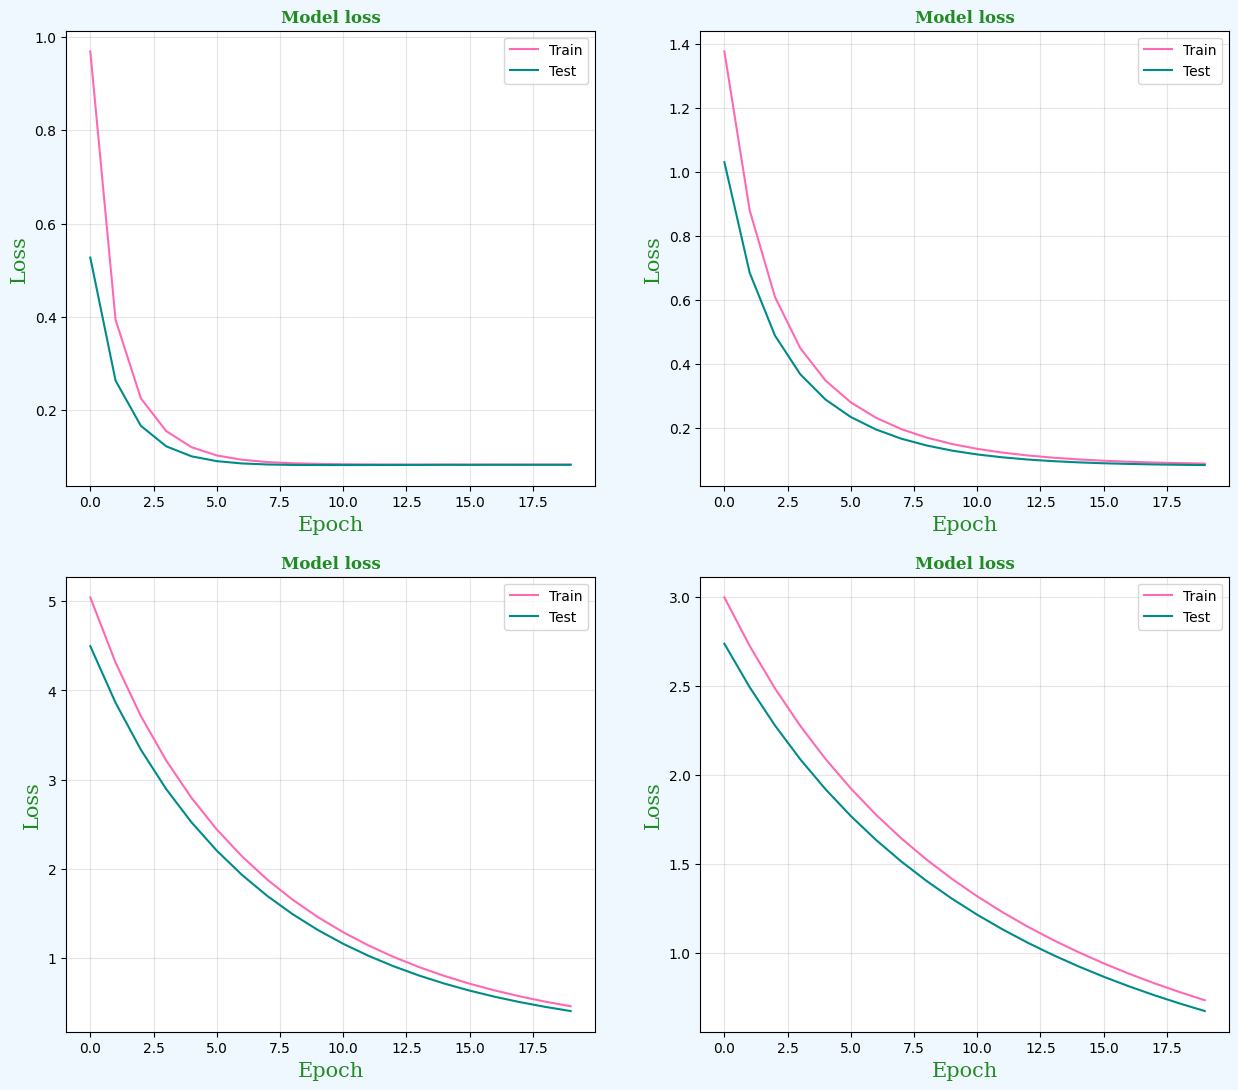

In [35]:
v_batch_size = np.array([20,50,100,200])
plt.figure(figsize= (15,13), facecolor = "AliceBlue")
for i in range(0, len(v_batch_size)):
    plt.subplot(2,2,i+1)
    model = tf.keras.Sequential()#IMPOSTIAMO MODELLO SEQUENZIALIE

    model.add(Dense(1, input_shape=(1,)))#SETTIAMO IL PRIMO LEYER: NUMERO_NEURONI = 1; 
    model.compile(optimizer="sgd", loss = "mse", metrics = ["mse"])#IMPOSTIAMO OTTIMIZZATOR= STOCHASTCI GRADIENT DESCENT;
                                                               #FUNZIONE COSTO = MEAN SQUARE ERROR
                                                               #METRICA = MEAN SQUARE ERROR
    #EFFETTUIAMO FIT SFRUTTANDO I DATI DI TRAINING:
    history = model.fit(    x=x_train, y=y_train, 
                        batch_size=v_batch_size[i], epochs=num_epochs,
                        # shuffle input before each epoch (not mandatory)
                        shuffle=True,                        
                        validation_data=(x_test, y_test), verbose = 0)
    print("batch_size = " + str(v_batch_size[i]))
    print_results()
    plt.plot(history.history["loss"], color = "hotpink")
    plt.plot(history.history["val_loss"], color = "DarkCyan")
    plt.title('Model loss', fontweight = "bold", family = "serif", color = "ForestGreen")
    font = {'family':'serif', 'color':'ForestGreen', 'size':'15'}
    plt.ylabel('Loss', fontdict = font)
    plt.xlabel('Epoch', fontdict = font)
    plt.legend(['Train', 'Test'], loc='best')
    plt.grid("true", color = "grey", alpha = 0.2)
plt.show()
    
 

Si osserva che fissando il numero di epoche, la velocità dell'apprendimento dipende fortemente da batch_size. Infatti, per grandi batch_size, l'apprendimento è rapido e la capacità predittiva scarsa. Nel caso opposto, l'apprendimento è molto più lento ma le capacità predittive sono indubbiamente migliori. Sporcando i dati con un errore abbastanza grande, la seconda opzione permette di ottenere un fit soddisfacente.

<h4><font color = 'Black'>2)Ottimizzatori</font></h4>

Consideriamo ora invece il caso di diversi ottimizzatori:

Optimezer = AdaGrad
PARAMETRI TRAINING MODELLO:
COEFFICIENTE ANGOLARE:  m = [[1.0319194]]
INTERCETTA: q = [0.04852654]

TEST DATA:
Test loss:      1.1585960388183594
Test accuracy:  1.1585960388183594

EXACT CURVE:
Test loss:      0.9979681968688965
Test accuracy:  0.9979681968688965
Optimezer = Adadelta
PARAMETRI TRAINING MODELLO:
COEFFICIENTE ANGOLARE:  m = [[1.0825362]]
INTERCETTA: q = [0.00131874]

TEST DATA:
Test loss:      1.252503514289856
Test accuracy:  1.252503514289856

EXACT CURVE:
Test loss:      1.2566670179367065
Test accuracy:  1.2566670179367065
Optimezer = ADAM
PARAMETRI TRAINING MODELLO:
COEFFICIENTE ANGOLARE:  m = [[1.6014137]]
INTERCETTA: q = [0.53774345]

TEST DATA:
Test loss:      0.31519410014152527
Test accuracy:  0.31519410014152527

EXACT CURVE:
Test loss:      0.2646787166595459
Test accuracy:  0.2646787166595459
Optimezer = ADAMAX
PARAMETRI TRAINING MODELLO:
COEFFICIENTE ANGOLARE:  m = [[1.7312809]]
INTERCETTA: q = [0.53263664]

TEST DATA:
Test loss:      0

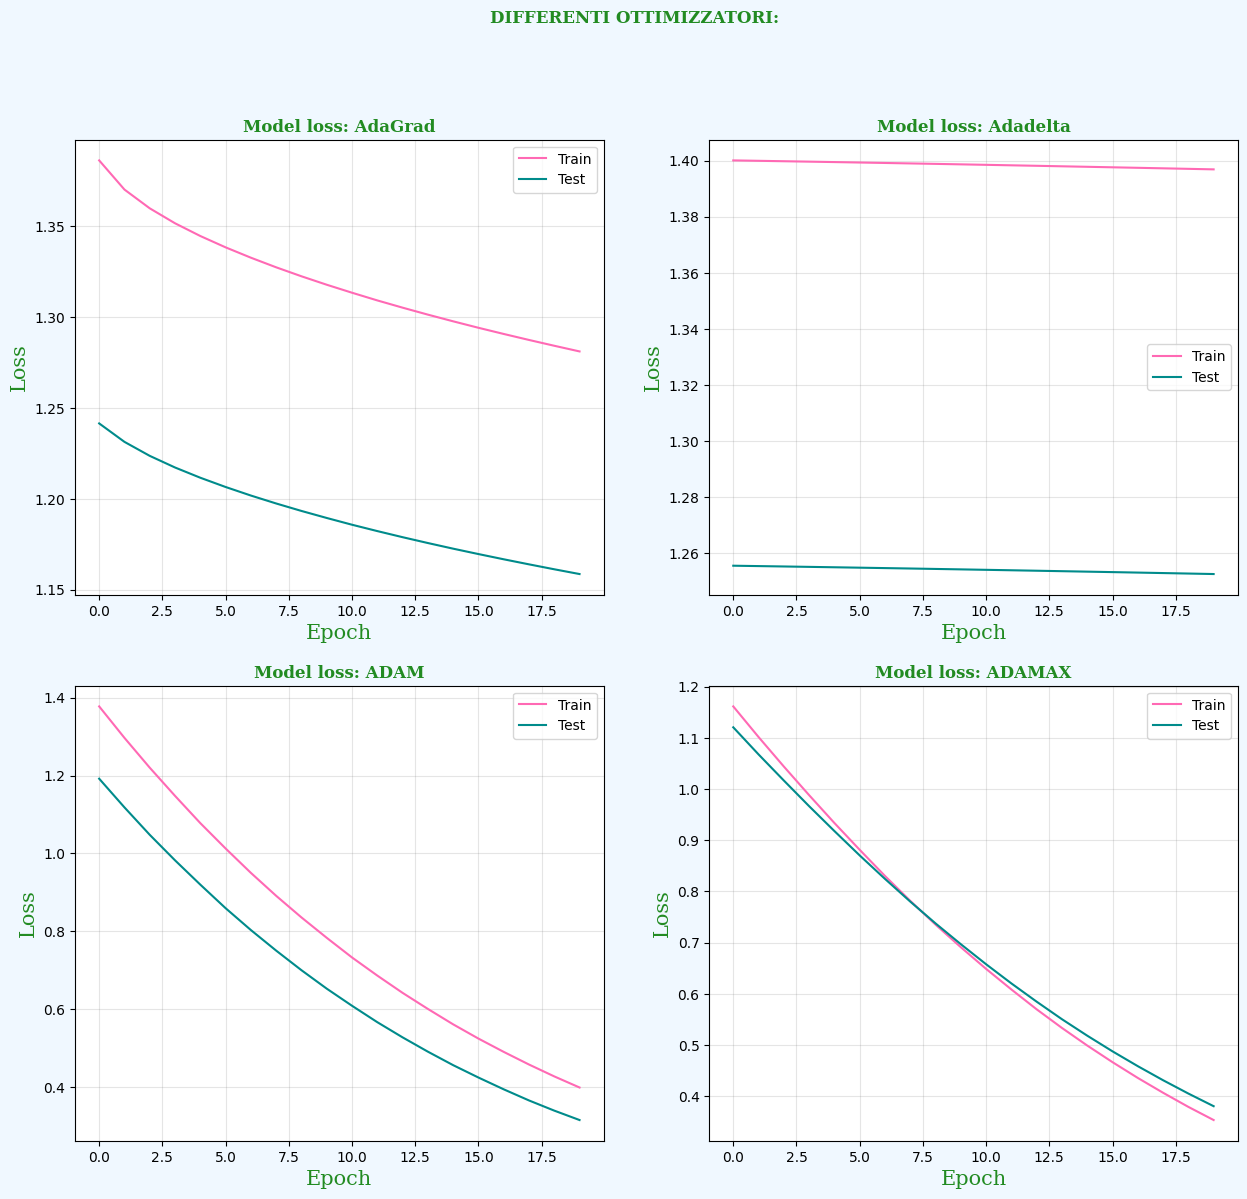

In [37]:
myOptimezers = np.array(["AdaGrad", "Adadelta", "ADAM", "ADAMAX"])
plt.figure(figsize= (15,13), facecolor = "AliceBlue")
plt.suptitle("DIFFERENTI OTTIMIZZATORI: ", fontweight = "bold", family = "serif", color = "ForestGreen")
for i in range(0, len(myOptimezers)):
    plt.subplot(2,2,i+1)
    num_train=1000
    num_test=50
    noise = 0.3
    set()
    model = tf.keras.Sequential()#IMPOSTIAMO MODELLO SEQUENZIALIE

    model.add(Dense(1, input_shape=(1,)))#SETTIAMO IL PRIMO LEYER: NUMERO_NEURONI = 1; 
    model.compile(optimizer=myOptimezers[i], loss = "mse", metrics = ["mse"])#IMPOSTIAMO OTTIMIZZATOR= STOCHASTCI GRADIENT DESCENT;
                                                               #FUNZIONE COSTO = MEAN SQUARE ERROR
                                                               #METRICA = MEAN SQUARE ERROR
    #EFFETTUIAMO FIT SFRUTTANDO I DATI DI TRAINING:
    history = model.fit(    x=x_train, y=y_train, 
                        batch_size=num_batch_size, epochs=num_epochs,
                        # shuffle input before each epoch (not mandatory)
                        shuffle=True,                        
                        validation_data=(x_test, y_test), verbose = 0)
    print("Optimezer = " + myOptimezers[i])
    print_results()
    plt.plot(history.history["loss"], color = "hotpink")
    plt.plot(history.history["val_loss"], color = "DarkCyan")
    plt.title('Model loss: '+myOptimezers[i], fontweight = "bold", family = "serif", color = "ForestGreen")
    font = {'family':'serif', 'color':'ForestGreen', 'size':'15'}
    plt.ylabel('Loss', fontdict = font)
    plt.xlabel('Epoch', fontdict = font)
    plt.legend(['Train', 'Test'], loc='best')
    plt.grid("true", color = "grey", alpha = 0.2)
plt.show()

<h4><font color = 'Black'>3)Rumori</font></h4>

Prendiamo differenti rumori:

noise = 0.0
PARAMETRI TRAINING MODELLO:
COEFFICIENTE ANGOLARE:  m = [[1.974812]]
INTERCETTA: q = [1.0003312]

TEST DATA:
Test loss:      0.0002799750945996493
Test accuracy:  0.0002799750945996493

EXACT CURVE:
Test loss:      0.0002799750945996493
Test accuracy:  0.0002799750945996493
noise = 0.4
PARAMETRI TRAINING MODELLO:
COEFFICIENTE ANGOLARE:  m = [[1.9574126]]
INTERCETTA: q = [1.0188414]

TEST DATA:
Test loss:      0.18516665697097778
Test accuracy:  0.18516665697097778

EXACT CURVE:
Test loss:      0.001046607387252152
Test accuracy:  0.001046607387252152
noise = 0.8
PARAMETRI TRAINING MODELLO:
COEFFICIENTE ANGOLARE:  m = [[1.9728278]]
INTERCETTA: q = [1.007547]

TEST DATA:
Test loss:      0.5692198872566223
Test accuracy:  0.5692198872566223

EXACT CURVE:
Test loss:      0.00027521999436430633
Test accuracy:  0.00027521999436430633
noise = 1.2
PARAMETRI TRAINING MODELLO:
COEFFICIENTE ANGOLARE:  m = [[1.980465]]
INTERCETTA: q = [0.9687853]

TEST DATA:
Test loss:      1.042096376

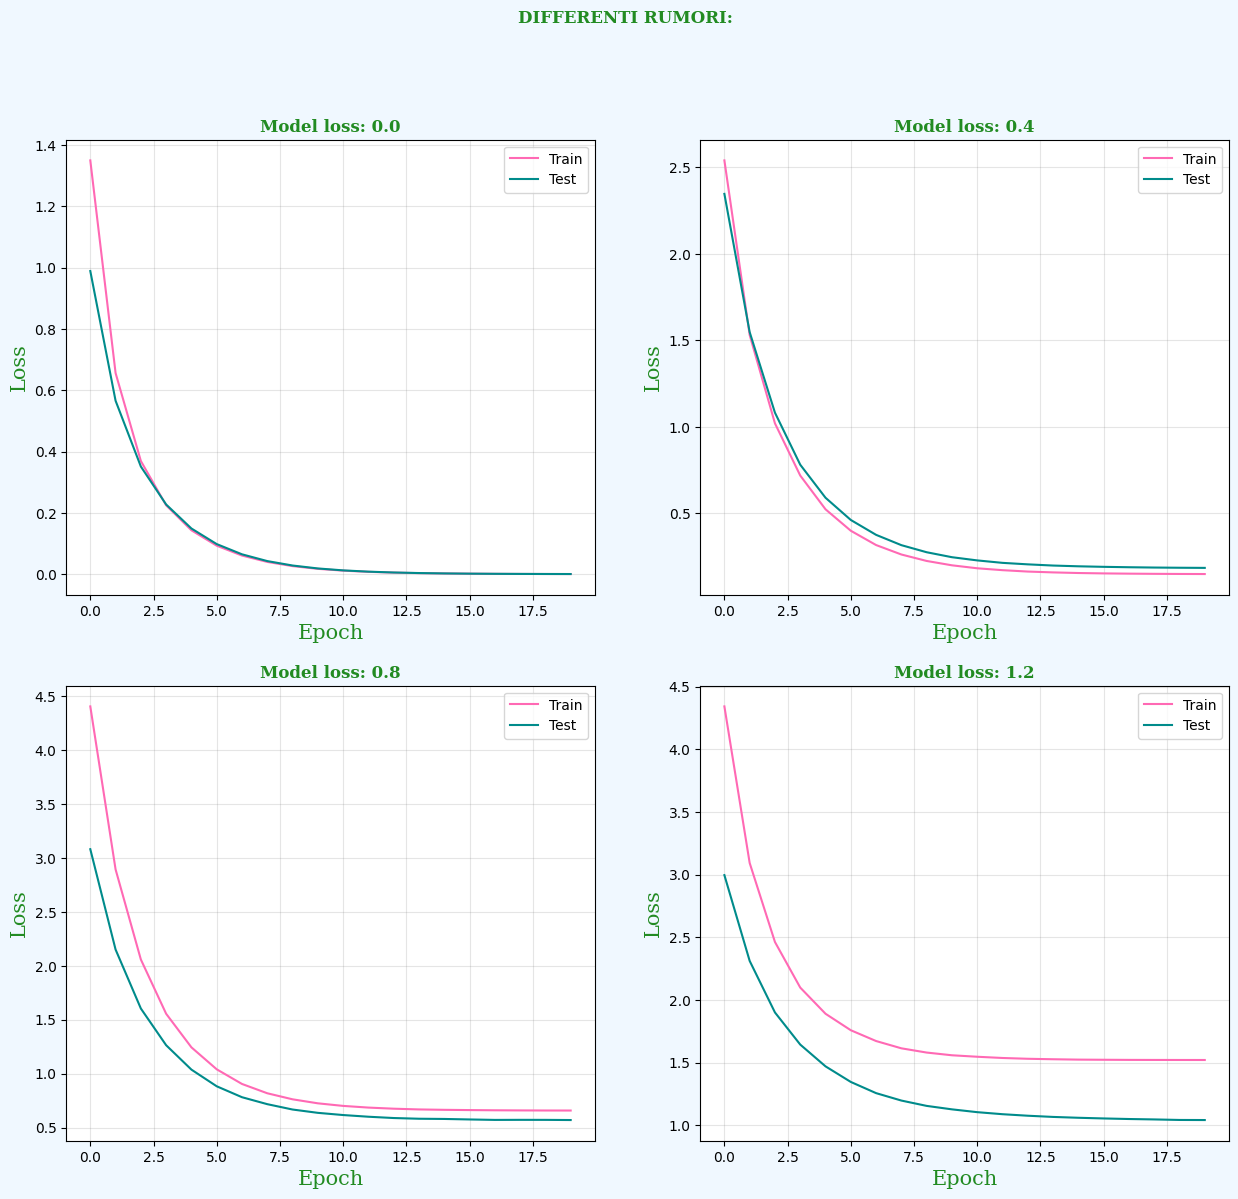

In [38]:
myNoises = np.array([0, 0.4, 0.8, 1.2])
plt.figure(figsize= (15,13), facecolor = "AliceBlue")
plt.suptitle("DIFFERENTI RUMORI: ", fontweight = "bold", family = "serif", color = "ForestGreen")
for i in range(0, len(myNoises)):
    plt.subplot(2,2,i+1)
    num_train=1000
    num_test=50
    noise = myNoises[i]
    set()
    model = tf.keras.Sequential()#IMPOSTIAMO MODELLO SEQUENZIALIE

    model.add(Dense(1, input_shape=(1,)))#SETTIAMO IL PRIMO LEYER: NUMERO_NEURONI = 1; 
    model.compile(optimizer="sgd", loss = "mse", metrics = ["mse"])#IMPOSTIAMO OTTIMIZZATOR= STOCHASTCI GRADIENT DESCENT;
                                                               #FUNZIONE COSTO = MEAN SQUARE ERROR
                                                               #METRICA = MEAN SQUARE ERROR
    #EFFETTUIAMO FIT SFRUTTANDO I DATI DI TRAINING:
    history = model.fit(    x=x_train, y=y_train, 
                        batch_size=num_batch_size, epochs=num_epochs,
                        # shuffle input before each epoch (not mandatory)
                        shuffle=True,                        
                        validation_data=(x_test, y_test), verbose = 0)
    print("noise = " + str(myNoises[i]))
    print_results()
    plt.plot(history.history["loss"], color = "hotpink")
    plt.plot(history.history["val_loss"], color = "DarkCyan")
    plt.title('Model loss: '+str(myNoises[i]), fontweight = "bold", family = "serif", color = "ForestGreen")
    font = {'family':'serif', 'color':'ForestGreen', 'size':'15'}
    plt.ylabel('Loss', fontdict = font)
    plt.xlabel('Epoch', fontdict = font)
    plt.legend(['Train', 'Test'], loc='best')
    plt.grid("true", color = "grey", alpha = 0.2)
plt.show()

Al crescere del rumore, cala la capacita' predittiva del rumore a parita' di modello.

<h4><font color = 'Black'>4)Loss</font></h4>

Ed infine prendiamo in considerazione differenti Loss considerando come ottimizzatore lo stochastic gradient descend

loss = mse
PARAMETRI TRAINING MODELLO:
COEFFICIENTE ANGOLARE:  m = [[1.9806633]]
INTERCETTA: q = [0.98312294]

TEST DATA:
Test loss:      0.06848349422216415
Test accuracy:  0.06848349422216415

EXACT CURVE:
Test loss:      0.00034943074570037425
Test accuracy:  0.00034943074570037425
loss = MeanAbsoluteError
PARAMETRI TRAINING MODELLO:
COEFFICIENTE ANGOLARE:  m = [[1.3456136]]
INTERCETTA: q = [0.93562627]

TEST DATA:
Test loss:      0.3423368036746979
Test accuracy:  0.17588096857070923

EXACT CURVE:
Test loss:      0.31369340419769287
Test accuracy:  0.13142827153205872
loss = MeanSquaredLogarithmicError
PARAMETRI TRAINING MODELLO:
COEFFICIENTE ANGOLARE:  m = [[-1.007001]]
INTERCETTA: q = [-0.6360304]

TEST DATA:
Test loss:      0.7486468553543091
Test accuracy:  6.6554083824157715

EXACT CURVE:
Test loss:      0.7227112054824829
Test accuracy:  6.35542106628418
loss = LogCosh
PARAMETRI TRAINING MODELLO:
COEFFICIENTE ANGOLARE:  m = [[1.3893067]]
INTERCETTA: q = [1.0096864]

TEST DATA

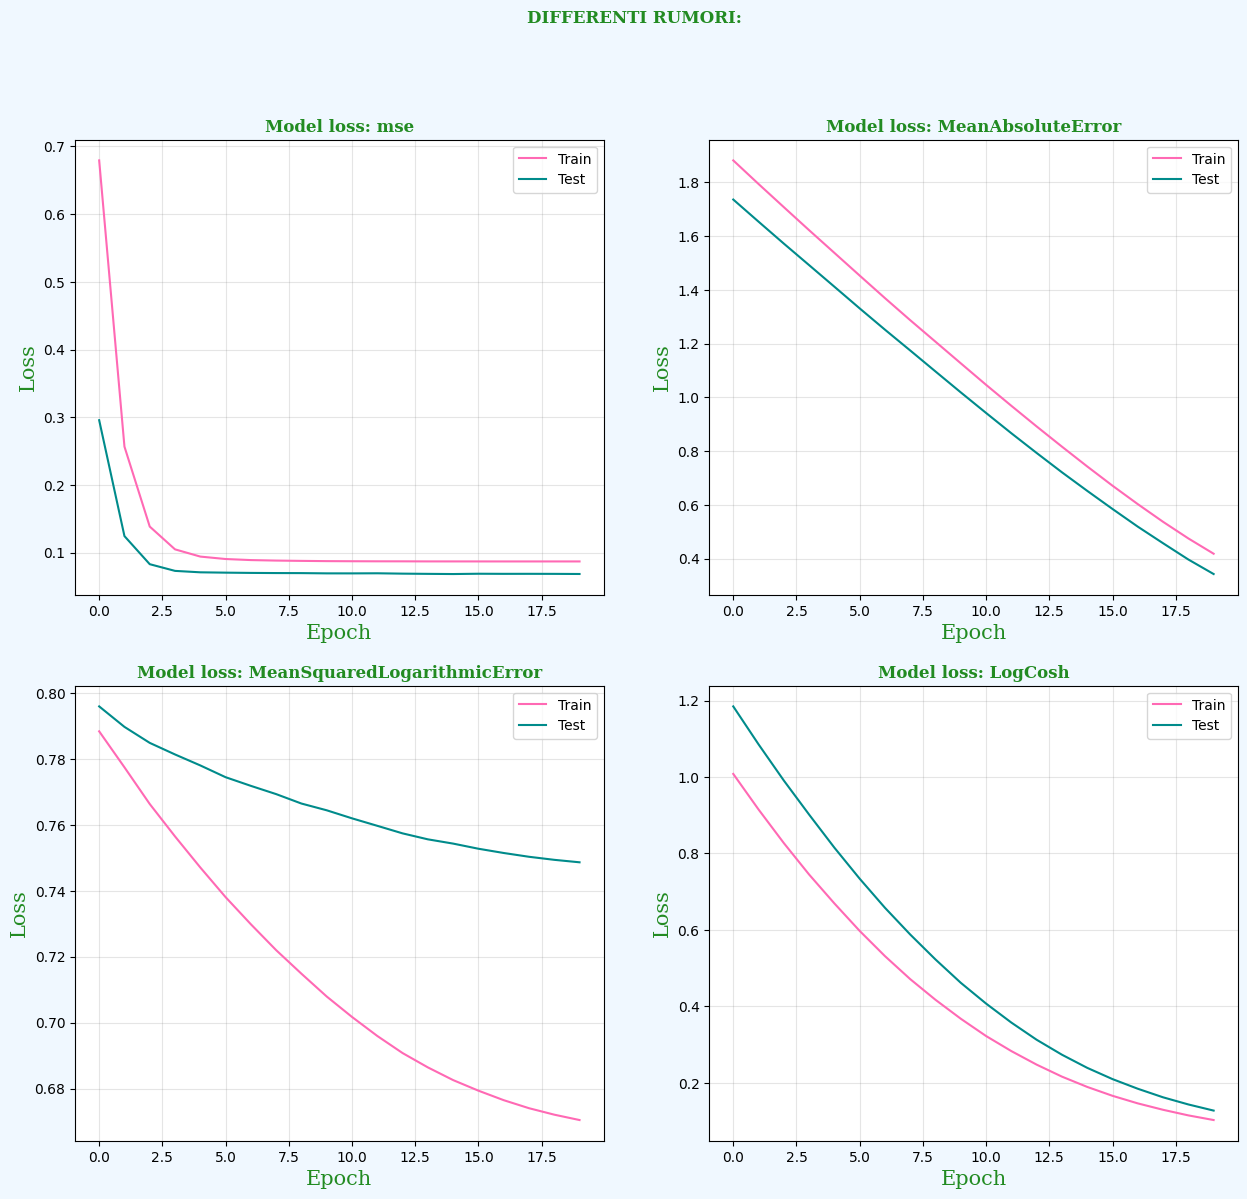

In [39]:
myLosses = np.array(["mse", "MeanAbsoluteError", "MeanSquaredLogarithmicError", "LogCosh"])
plt.figure(figsize= (15,13), facecolor = "AliceBlue")
plt.suptitle("DIFFERENTI RUMORI: ", fontweight = "bold", family = "serif", color = "ForestGreen")
for i in range(0, len(myNoises)):
    plt.subplot(2,2,i+1)
    num_train=1000
    num_test=50
    noise = 0.3
    set()
    model = tf.keras.Sequential()#IMPOSTIAMO MODELLO SEQUENZIALIE

    model.add(Dense(1, input_shape=(1,)))#SETTIAMO IL PRIMO LEYER: NUMERO_NEURONI = 1; 
    model.compile(optimizer="sgd", loss = myLosses[i], metrics = ["mse"])#IMPOSTIAMO OTTIMIZZATOR= STOCHASTCI GRADIENT DESCENT;
                                                               #FUNZIONE COSTO = MEAN SQUARE ERROR
                                                               #METRICA = MEAN SQUARE ERROR
    #EFFETTUIAMO FIT SFRUTTANDO I DATI DI TRAINING:
    history = model.fit(    x=x_train, y=y_train, 
                        batch_size=num_batch_size, epochs=num_epochs,
                        # shuffle input before each epoch (not mandatory)
                        shuffle=True,                        
                        validation_data=(x_test, y_test), verbose = 0)
    print("loss = " + myLosses[i])
    print_results()
    plt.plot(history.history["loss"], color = "hotpink")
    plt.plot(history.history["val_loss"], color = "DarkCyan")
    plt.title('Model loss: '+myLosses[i], fontweight = "bold", family = "serif", color = "ForestGreen")
    font = {'family':'serif', 'color':'ForestGreen', 'size':'15'}
    plt.ylabel('Loss', fontdict = font)
    plt.xlabel('Epoch', fontdict = font)
    plt.legend(['Train', 'Test'], loc='best')
    plt.grid("true", color = "grey", alpha = 0.2)
plt.show()

<h2><font color = 'LimeGreen'>ESERCIZIO 11.2: Fit Polinomiale</font></h2>

Scriviamo ora anzitutto i dati a disposizione, in particolare i parametri della relazione funzionale di forma polinomiale che ci proponiamo di fittare
<p style = "text-align:center"> $f(x)=4-3x-2x^2+3x^3$</p>

In [40]:
# target parameters of f(x) = 4-3x-2x^2+3x^3
a = 3 # slope
b = 2 # intersect
c = 3
d = 4# generate training inputs


Scriviamo pure i parametri del fit:

In [41]:
#PARAMETRI FIT:
num_epochs = 40
num_train = 10000
num_batch_size = 20
num_test = 50
noise = 0.3

In [ ]:
Andando ora a sporcare la relazione esatta per ricavare il dataset per questa esercitazione:

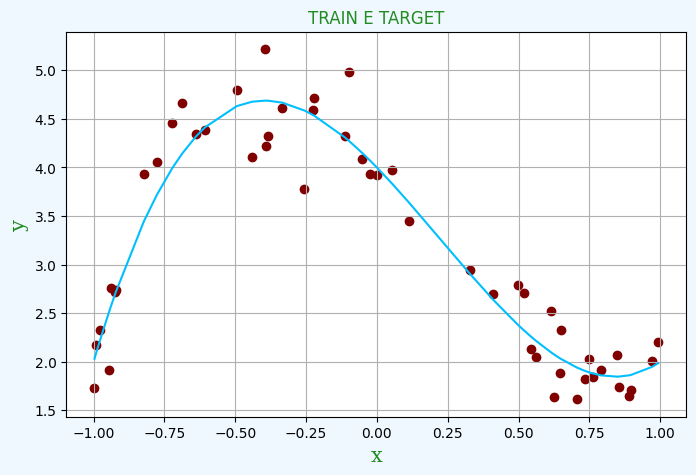

In [42]:

np.random.seed(0)
x_train = np.random.uniform(-1, 1, num_train)
x_valid = np.random.uniform(-1, 1, num_test)
x_valid.sort()
y_target = d-c*x_valid-b*x_valid**2+a*pow(x_valid,3) # ideal (target) linear function


y_train = np.random.normal(d-c*x_train-b*x_train**2+a*pow(x_train,3), noise) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(d-c*x_valid-b*x_valid**2+a*pow(x_valid,3), noise)
                           
plt.figure(figsize=(8,5), facecolor = "AliceBlue")
plt.title("TRAIN E TARGET", color = "ForestGreen")
font = {'family':'serif','color':'ForestGreen', 'size':'15'}
plt.xlabel("x", fontdict = font)
plt.ylabel("y", fontdict = font)
plt.plot(x_valid, y_target, color = "DeepSkyBlue")
plt.scatter(x_valid, y_valid, color='Maroon')
plt.grid(True)
plt.show()

Costruiamoci il nostro modello, cioe' la rete neurale di tipo sequenziale e con i nodi di un leyer collegati a tutti i nodi del leyer precedente e successivo.

In [44]:
model = tf.keras.Sequential()

model.add(Dense(1, input_shape=(1,)))#LEYER INPUT
model.add(Dense(5,activation='softsign'))#I LEYER NASCOSTO
model.add(Dense(15,activation='softsign'))
model.add(Dense(15,activation='softsign'))
model.add(Dense(15,activation='softsign'))
model.add(Dense(15,activation='softsign'))
model.add(Dense(15,activation='softsign'))
model.add(Dense(15,activation='softsign'))
model.add(Dense(15,activation='softsign'))
model.add(Dense(15,activation='softsign'))
model.add(Dense(5,activation='softsign'))#ULTIMO LEYER NASCOSTO
model.add(Dense(1,))#LEYER OUTPUT

model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

Facciamo il trainig

In [45]:
history = model.fit(x=x_train, y=y_train, 
          batch_size=num_batch_size, epochs=num_epochs,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/40
500/500 [==============================] - 2s 3ms/step - loss: 0.7296 - mse: 0.7296 - val_loss: 0.5741 - val_mse: 0.5741
Epoch 2/40
500/500 [==============================] - 1s 3ms/step - loss: 0.3530 - mse: 0.3530 - val_loss: 0.5631 - val_mse: 0.5631
Epoch 3/40
500/500 [==============================] - 1s 3ms/step - loss: 0.3500 - mse: 0.3500 - val_loss: 0.5669 - val_mse: 0.5669
Epoch 4/40
500/500 [==============================] - 1s 3ms/step - loss: 0.3473 - mse: 0.3473 - val_loss: 0.5810 - val_mse: 0.5810
Epoch 5/40
500/500 [==============================] - 1s 3ms/step - loss: 0.3459 - mse: 0.3459 - val_loss: 0.5584 - val_mse: 0.5584
Epoch 6/40
500/500 [==============================] - 1s 3ms/step - loss: 0.3413 - mse: 0.3413 - val_loss: 0.5574 - val_mse: 0.5574
Epoch 7/40
500/500 [==============================] - 1s 3ms/step - loss: 0.3079 - mse: 0.3079 - val_loss: 0.3994 - val_mse: 0.3994
Epoch 8/40
500/500 [==============================] - 1s 3ms/step - loss: 0.

Valuriamo ora la funzione costo sui dati di validazione:

In [46]:
# Test dei dati rimanenti.
score = model.evaluate(x_valid, y_valid, batch_size=num_batch_size, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

3/3 [==============================] - 0s 4ms/step - loss: 0.1070 - mse: 0.1070

Test loss: 0.10702091455459595
Test accuracy: 0.10702091455459595


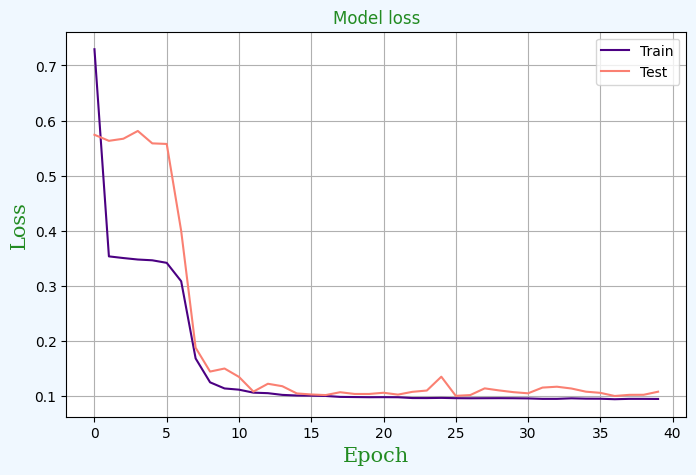

In [47]:

plt.figure(figsize=(8,5), facecolor = "AliceBlue")
plt.plot(history.history['loss'], color = "Indigo")
plt.plot(history.history['val_loss'], color = "Salmon")
plt.title('Model loss', color = "ForestGreen")
font = {'family':'serif','color':'ForestGreen', 'size':'15'}
plt.ylabel('Loss', fontdict = font)
plt.xlabel('Epoch', fontdict = font)
plt.legend(['Train', 'Test'], loc='best')
#plt.savefig("./Images2/Adadelta(softsign,loss).png")
plt.grid(True)
plt.show()

Andiamo ora a plottare le prvisioni teoriche coi valori predetti

Input dataset shape:  (100,)
1/1 [==============================] - 0s 83ms/step
Input dataset shape:  (100, 1)


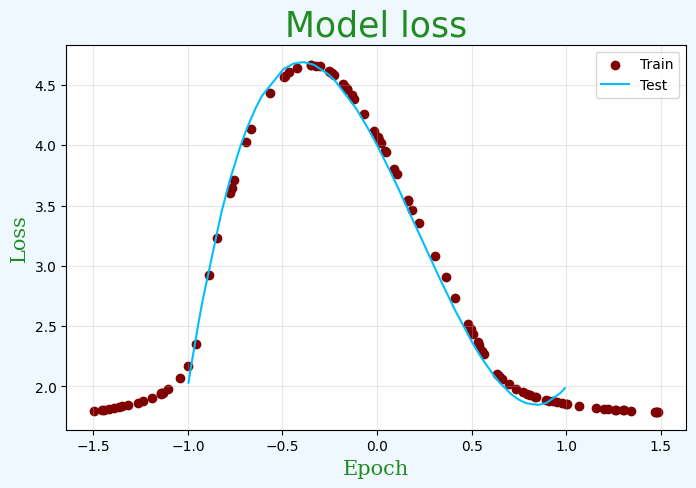

In [48]:
x_predicted = np.random.uniform(-1.5, 1.5, 100)
print("Input dataset shape: ", x_predicted.shape)
y_predicted = model.predict(x_predicted, batch_size=128)
print("Input dataset shape: ", y_predicted.shape)

plt.figure(figsize=(8,5), facecolor = "AliceBlue")
plt.title('Model loss', color = "ForestGreen", fontsize = "25")
font = {'family':'serif','color':'ForestGreen', 'size':'15'}
plt.ylabel('Loss', fontdict = font)
plt.xlabel('Epoch', fontdict = font)
plt.scatter(x_predicted, y_predicted, color='Maroon')
plt.plot(x_valid, y_target, color = "DeepSkyBlue")
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True, alpha = 0.3)
#plt.savefig("./Images2/Adadelta(softsign, curva).png")
plt.show()

<h2><font color = 'LimeGreen'>ESERCIZIO 11.3: Fit Funzionale, Seno 2D</font></h2>

Andiamo ora a fittare l'ultima e un po' piu' complicata funzione
<p style = "text-align:center"> $f(x)=\sin(x^2+y^2)$ </p>

Anzitutto definiamola:

In [63]:
def f(x,y):
    return np.sin(x**2 + y**2)

In seconda battuta, prendiamo in considerazione i dati di input:

In [64]:
#PARAMETRI FIT:
num_epochs = 200
num_train = 1000
num_batch_size = 5
num_test = 100
noise = 0.3

E scrviamo costruiamo pure il dataset per l'analisi:

In [65]:
np.random.seed(1)

x_train = np.random.uniform(-1.5, 1.5, num_train)
y_train = np.random.uniform(-1.5, 1.5, num_train)

x_valid = np.random.uniform(-1.5, 1.5, num_test)
y_valid = np.random.uniform(-1.5, 1.5, num_test)

z_target = f(x_valid, y_valid) 

z_train = np.random.normal(f(x_train,y_train), noise) 
z_valid = np.random.normal(f(x_valid,y_valid), noise)


Andiamo cosi' a plottare la superficie teorica e i plot di validazione:

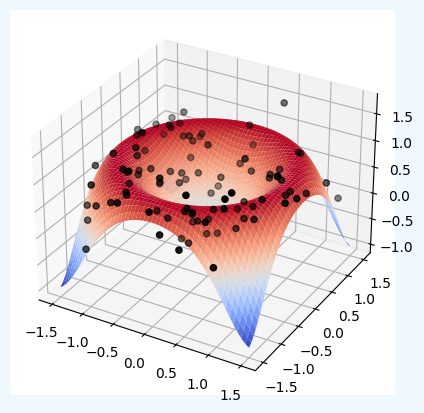

In [66]:
# IMPORT:
fig = plt.figure(figsize=(8,5), facecolor = "AliceBlue")
ax = fig.add_subplot(111, projection='3d')

x = np.linspace(-1.5, 1.5, num_train)
y = np.linspace(-1.5, 1.5, num_train)
x, y = np.meshgrid(x, y) #prodotto cartesiano.
z = f(x,y)

ax.plot_surface(x, y, z, cmap=cm.coolwarm, linewidth=2)
ax.scatter(x_valid, y_valid, z_valid, color='black')
ax.grid(True)
plt.show()

Costruiamo a questo punto il modello da ottimizzare: assumiamo come ottimizzatore SGD, affiancato da MAE come funzione Loss e metrica

In [67]:
model = tf.keras.Sequential()
model.add(Dense(5, input_shape=(2,)))
model.add(Dense(10,activation='elu'))
model.add(Dense(15,activation='elu'))
model.add(Dense(20,activation='elu'))
model.add(Dense(20,activation='elu'))
model.add(Dense(20,activation='elu'))
model.add(Dense(20,activation='elu'))
model.add(Dense(20,activation='elu'))
model.add(Dense(20,activation='elu'))
model.add(Dense(15,activation='elu'))
model.add(Dense(5,activation='elu'))
model.add(Dense(1,activation='elu'))
           
model.compile(optimizer='sgd', loss='mae', metrics=['mae'])

In [ ]:
Darto il modello, lo applichiamo sui dati di training:

In [68]:
data_train = np.transpose([x_train, y_train])
data_valid = np.transpose([x_valid, y_valid])

history = model.fit(x=data_train, y=z_train, 
          batch_size=num_batch_size, epochs=num_epochs,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(data_valid, z_valid))

Epoch 1/200
200/200 [==============================] - 3s 7ms/step - loss: 0.4127 - mae: 0.4127 - val_loss: 0.3349 - val_mae: 0.3349
Epoch 2/200
200/200 [==============================] - 1s 4ms/step - loss: 0.4001 - mae: 0.4001 - val_loss: 0.3357 - val_mae: 0.3357
Epoch 3/200
200/200 [==============================] - 1s 4ms/step - loss: 0.3997 - mae: 0.3997 - val_loss: 0.3445 - val_mae: 0.3445
Epoch 4/200
200/200 [==============================] - 1s 4ms/step - loss: 0.3998 - mae: 0.3998 - val_loss: 0.3300 - val_mae: 0.3300
Epoch 5/200
200/200 [==============================] - 1s 4ms/step - loss: 0.3968 - mae: 0.3968 - val_loss: 0.3356 - val_mae: 0.3356
Epoch 6/200
200/200 [==============================] - 1s 4ms/step - loss: 0.3987 - mae: 0.3987 - val_loss: 0.3327 - val_mae: 0.3327
Epoch 7/200
200/200 [==============================] - 1s 4ms/step - loss: 0.3957 - mae: 0.3957 - val_loss: 0.3378 - val_mae: 0.3378
Epoch 8/200
200/200 [==============================] - 1s 4ms/step - 

Valutiamo anzitutto la funzione costo sul target

In [69]:
score = model.evaluate(data_valid, z_target, batch_size=num_batch_size, verbose=1)

print()
print('Test loss:', score[0])
print('Test Mean Square Error:', score[1])

20/20 [==============================] - 0s 3ms/step - loss: 0.0639 - mae: 0.0639

Test loss: 0.06387069076299667
Test Mean Square Error: 0.06387069076299667


Dopodiche' passiamo ai dati di test

In [70]:
score = model.evaluate(data_valid, z_valid, batch_size=num_batch_size, verbose=1)

print()
print('Test loss:', score[0])
print('Test Mean Square Error:', score[1])

20/20 [==============================] - 0s 3ms/step - loss: 0.2424 - mae: 0.2424

Test loss: 0.24242852628231049
Test Mean Square Error: 0.24242852628231049


Andando a graficare l'andamento dei due errori in funzione delle epoche:

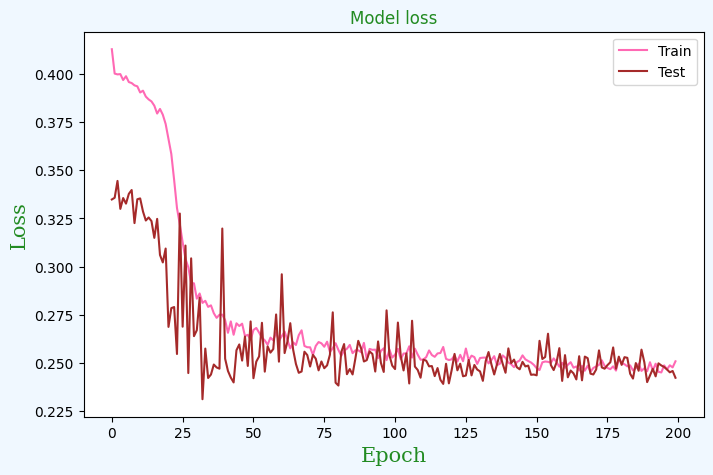

In [71]:
plt.figure(figsize=(8,5), facecolor = "AliceBlue")
plt.plot(history.history['loss'], color = "HotPink")
plt.plot(history.history['val_loss'], color = "Brown")
plt.title('Model loss', color = "ForestGreen")
font = {'family':'serif','color':'ForestGreen', 'size':'15'}
plt.ylabel('Loss', fontdict = font)
plt.xlabel('Epoch', fontdict = font)
plt.legend(['Train', 'Test'], loc='best')
plt.show()

In [ ]:
Andiamo infine a confrontare la soluzione esatta con ke previsioni.

32/32 [==============================] - 0s 3ms/step


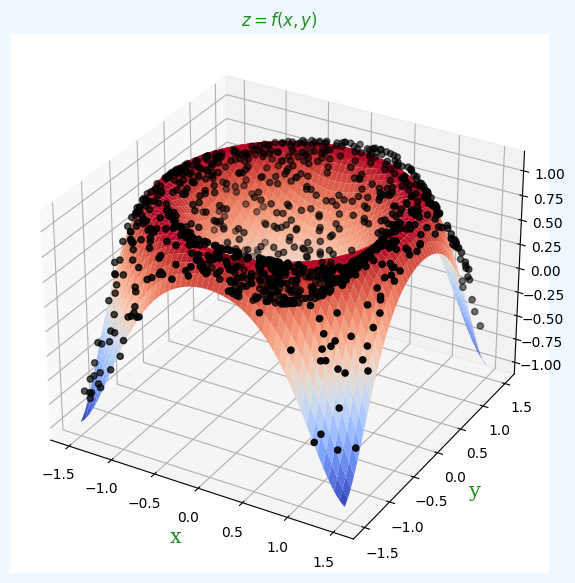

In [72]:
fig = plt.figure(figsize=(7,7), facecolor = "AliceBlue", edgecolor = "Indigo")
ax = fig.add_subplot(111, projection='3d')

x_predicted = np.random.uniform(-1.5, 1.5, num_train)
y_predicted = np.random.uniform(-1.5, 1.5, num_train)
data_predicted = np.transpose([x_predicted, y_predicted])
z_predicted = model.predict(data_predicted)
plt.title('$z=f(x,y)$', color = "ForestGreen")
font = {'family':'serif','color':'ForestGreen', 'size':'15'}
plt.ylabel('y', fontdict = font)
plt.xlabel('x', fontdict = font)

ax.scatter(x_predicted, y_predicted, z_predicted, color='black')
ax.plot_surface(x, y, z, cmap=cm.coolwarm, linewidth=2)
plt.show()